In [67]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500
import datetime
from sklearn.ensemble import RandomForestRegressor
from copy import deepcopy
from sklearn.decomposition import PCA
import seaborn as sb

def generateNormalizationPlot(peak_areas,runOrder,batches,met_names,qc_inds,samp_inds,path):

    for x in range(peak_areas.shape[1]):
        fig,axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(10,1))
        axes[0].set_title("QC samples")
        axes[1].set_title("research samples")
        axes[0].scatter(runOrder[qc_inds],peak_areas[qc_inds,x],c=batches[qc_inds],s=1)
        axes[0].set_yticks([],[])
        #axes[0,0].set_ylabel(met_names[x],fontsize=6)
        
        axes[1].scatter(runOrder[samp_inds],peak_areas[samp_inds,x],c=batches[samp_inds],s=1)
        axes[1].set_yticks([],[])
        plt.tight_layout()
        plt.savefig(path + met_names[x] + ".png")
        plt.close()


In [68]:
experimentParametersFn = "X:/LLFS/data_analysis/sample_metadata/LLFS_Experiment_parameters_Shipment1and2.csv"
pos_peak_area_file = "merged_peak_areas_polar_pos_imputted_normalized.csv"
neg_peak_area_file = "merged_peak_areas_polar_neg_imputted_normalized.csv"

In [69]:
metadata = pd.read_csv(experimentParametersFn)
metadata

,Batch #,Batch,Metabolomics identifier,Shipment
0,1,V,10014843_1,1
1,1,V,10014843_2,1
2,6,Q,10016673_1,1
3,6,Q,10016673_2,1
4,2,U,10041309_1,1
...,...,...,...,...
4000,43,AQ,49975486_1,2
4001,43,AQ,49975486_2,2
4002,12,F,49989098_1,1
4003,12,F,49989098_2,1


In [70]:
polarityInfo = pd.read_excel("Polarity_filtering.xlsx")
polarityInfo

,Name in peak area file,polarity,decision,comment
0,4-PYRIDOXATE,negative,keep,higher in neg but inconsistent integration of ...
1,4-PYRIDOXATE,positive,delete,NaN
2,ADENOSINE-MONOPHOSPHATE,negative,keep,lower in pos
3,ADENOSINE-MONOPHOSPHATE,positive,delete,NaN
4,CITRULLINE,negative,keep,both work
5,Citrulline,positive,delete,NaN
6,CREATININE,negative,delete,NaN
7,CREATININE,positive,keep,much higher in pos
8,GLUTAMATE,negative,keep,higher
9,GLUTAMATE,positive,delete,NaN


In [71]:
batches = [x for x in list(set(metadata["Batch"].values)) if x != "AR"]
batches.sort()
batches

['A',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF',
 'AG',
 'AH',
 'AI',
 'AJ',
 'AK',
 'AL',
 'AM',
 'AN',
 'AO',
 'AP',
 'AQ',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [72]:
metadata = metadata[metadata["Batch"].isin(batches)]
metadata["peak area sample name"] = ["Batch" + str(batch) + "_" + id for batch,id in zip(metadata["Batch #"],metadata["Metabolomics identifier"])]
metadata

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Batch #,Batch,Metabolomics identifier,Shipment,peak area sample name
0,1,V,10014843_1,1,Batch1_10014843_1
1,1,V,10014843_2,1,Batch1_10014843_2
2,6,Q,10016673_1,1,Batch6_10016673_1
3,6,Q,10016673_2,1,Batch6_10016673_2
4,2,U,10041309_1,1,Batch2_10041309_1
...,...,...,...,...,...
4000,43,AQ,49975486_1,2,Batch43_49975486_1
4001,43,AQ,49975486_2,2,Batch43_49975486_2
4002,12,F,49989098_1,1,Batch12_49989098_1
4003,12,F,49989098_2,1,Batch12_49989098_2


In [73]:
pos_peaks = pd.read_csv(pos_peak_area_file)
badMets = ["4 Butylaniline","4 Pentylaniline","4-Isopropylaniline","Indoline","5-HYDROXYINDOLEACETATE","RIBOFLAVIN"]
mapper = {col:col.replace("QC_Splash","QC") for col in pos_peaks.columns.values}
pos_peaks = pos_peaks.rename(mapper,axis=1)
filt = pos_peaks[pos_peaks["Unnamed: 0"].isin(badMets)]
pos_peaks = pos_peaks.drop(filt.index.values,axis=0)

filteredPolarity = polarityInfo[(polarityInfo["polarity"] == "positive") & (polarityInfo["decision"] == "delete")]
filt = pos_peaks[pos_peaks["Unnamed: 0"].isin(filteredPolarity["Name in peak area file"])]
pos_peaks = pos_peaks.drop(filt.index.values,axis=0)

pos_peaks["assay"] = "polar_pos"


pos_peaks

,Unnamed: 0,Batch1_QC_01,Batch1_18270389_2,Batch1_13135943_1,Batch1_10800001_1,Batch1_13135943_2,Batch1_12397428_1,Batch1_10457357_1,Batch1_12552874_1,Batch1_12406146_1,...,Batch43_47234570_1,Batch43_22592403_1,Batch43_21224361_2,Batch43_41519985_1,Batch43_48823298_2,Batch43_20214140_1,Batch43_41550303_1,Batch43_45611266_1,Batch43_QC_09,assay
0,DL-2-Aminooctanoic acid,1.520814e+06,1.680481e+06,2.098481e+06,8.364250e+05,1.509812e+06,2.568371e+06,1.628636e+06,7.042096e+05,9.264860e+05,...,6.307791e+05,1.383205e+06,5.529746e+05,6.832787e+05,2.477801e+06,7.563646e+05,5.707430e+05,7.737551e+05,1.541432e+06,polar_pos
1,Homostachydrine,7.303151e+05,3.495565e+05,1.245263e+06,1.094810e+06,3.130584e+05,2.225324e+06,3.608774e+05,5.568893e+05,1.797838e+06,...,7.549187e+05,2.335821e+05,6.512467e+05,5.168415e+05,7.355087e+05,5.075603e+05,5.496599e+05,2.697459e+05,7.399589e+05,polar_pos
2,2-Aminobutyric acid,3.042292e+06,2.818492e+06,3.170177e+06,2.702041e+06,3.139837e+06,1.471388e+07,1.845654e+06,2.385485e+06,3.908583e+06,...,4.518470e+06,2.184468e+06,2.111428e+06,2.612831e+06,2.880093e+06,2.052902e+06,1.515226e+06,1.449198e+06,3.042713e+06,polar_pos
3,Prolylleucine,1.986430e+06,2.293874e+06,1.840432e+06,9.836316e+05,1.623830e+06,5.647065e+06,1.154363e+06,1.847033e+06,1.601308e+06,...,1.996569e+06,9.461310e+05,8.147341e+05,8.276725e+05,2.044511e+06,9.474888e+05,8.638931e+05,1.305442e+06,1.991229e+06,polar_pos
4,Norvaline,2.682169e+07,1.540531e+07,2.587917e+07,9.315948e+06,1.349270e+07,1.121179e+07,1.314913e+07,9.312292e+06,9.275203e+06,...,5.533119e+06,7.607609e+06,4.757579e+06,1.014524e+07,6.465742e+06,2.473767e+07,2.241554e+07,6.069710e+06,2.696433e+07,polar_pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,Erucamide,4.317990e+06,4.136603e+06,4.140963e+06,3.422348e+06,3.739018e+06,3.374387e+06,4.213603e+06,7.296288e+06,4.695544e+06,...,3.028953e+06,1.319902e+06,4.677636e+06,5.557946e+05,9.128468e+05,1.918823e+06,1.173399e+06,7.491089e+05,4.280340e+06,polar_pos
119,LEUCINE,3.281208e+07,4.647248e+07,2.730265e+07,2.382817e+07,3.254809e+07,2.882292e+07,2.973397e+07,3.411364e+07,2.620845e+07,...,3.598777e+07,3.174280e+07,2.597584e+07,3.388119e+07,3.655630e+07,4.090209e+07,3.734834e+07,3.767735e+07,3.272231e+07,polar_pos
120,THEOPHYLLINE,5.259981e+05,4.826963e+05,7.595113e+05,9.409581e+05,8.912013e+05,1.104510e+06,1.217819e+06,7.419857e+05,1.164162e+06,...,1.113972e+06,3.515424e+05,1.898999e+05,2.074358e+05,1.744732e+05,1.335354e+06,7.360783e+05,2.953000e+05,5.108676e+05,polar_pos
121,U13C-U15N-Alanine,2.794434e+05,4.236966e+05,3.772867e+05,3.057775e+05,3.588234e+05,2.218733e+05,3.519902e+05,3.111730e+05,3.802436e+05,...,2.354765e+05,2.688541e+05,2.659736e+05,2.780374e+05,2.561786e+05,2.400382e+05,2.532152e+05,2.387408e+05,2.835003e+05,polar_pos


In [74]:
neg_peaks = pd.read_csv(neg_peak_area_file)
badMets = ["2 Phenylphenol","10-HYDROXYDECANOATE","N_N-Diethyl-4-hydroxybenzamide","Paracetamol","XANTHINE","S-Adenosylhomocystein",
           "S-ADENOSYLHOMOCYSTEINE","D-ORNITHINE","VANILLIN","MANDELATE","TRANS-1,2-CYCLOHEXANEDIOL", "HEXANOATE","FUMARATE"]
mapper = {col:col.replace("QC_Splash","QC") for col in neg_peaks.columns.values}
neg_peaks = neg_peaks.rename(mapper,axis=1)
filt = neg_peaks[neg_peaks["Unnamed: 0"].isin(badMets)]
neg_peaks = neg_peaks.drop(filt.index.values,axis=0)

filteredPolarity = polarityInfo[(polarityInfo["polarity"] == "negative") & (polarityInfo["decision"] == "delete")]
filt = neg_peaks[neg_peaks["Unnamed: 0"].isin(filteredPolarity["Name in peak area file"])]
neg_peaks = neg_peaks.drop(filt.index.values,axis=0)

neg_peaks["assay"] = "polar_neg"

neg_peaks

,Unnamed: 0,Batch1_QC_01,Batch1_18270389_2,Batch1_13135943_1,Batch1_10800001_1,Batch1_13135943_2,Batch1_12397428_1,Batch1_10457357_1,Batch1_12552874_1,Batch1_12406146_1,...,Batch43_47234570_1,Batch43_22592403_1,Batch43_21224361_2,Batch43_41519985_1,Batch43_48823298_2,Batch43_20214140_1,Batch43_41550303_1,Batch43_45611266_1,Batch43_QC_09,assay
0,TREHALOSE,2.792031e+05,2.255229e+05,2.009263e+05,1.133262e+05,3.753312e+05,3.362139e+05,4.674220e+04,2.408277e+05,6.309441e+04,...,1.314702e+05,3.796338e+04,2.503812e+04,2.671038e+04,3.421229e+04,7.408076e+04,1.116912e+05,3.148494e+04,2.694427e+05,polar_neg
2,3 2 6 Dioxocyclohexyl propanenitrile,1.485741e+06,8.929736e+05,2.574714e+06,2.465908e+05,7.615358e+05,3.877078e+05,5.026788e+05,2.945875e+05,3.529052e+05,...,6.141159e+05,4.905300e+05,5.115298e+05,6.235245e+05,4.543220e+05,1.405695e+06,2.216009e+06,5.234131e+05,1.449806e+06,polar_neg
3,CITRULLINE,2.835770e+06,3.150605e+06,2.918455e+06,3.268618e+06,2.689546e+06,4.000613e+06,2.664172e+06,1.772883e+06,2.631132e+06,...,3.390417e+06,1.784928e+06,1.640307e+06,1.885898e+06,2.616816e+06,2.081060e+06,1.632908e+06,2.050122e+06,2.880734e+06,polar_neg
4,Indolelactic acid,2.185358e+06,2.917887e+06,1.445684e+06,1.516120e+06,1.279977e+06,4.568073e+06,2.929334e+06,2.229724e+06,3.676379e+06,...,2.111266e+06,1.337049e+06,1.546060e+06,1.138928e+06,2.306160e+06,2.514132e+06,3.992431e+06,2.146672e+06,2.170407e+06,polar_neg
5,4-PYRIDOXATE,3.276593e+06,1.001014e+06,1.563058e+06,1.410424e+06,5.201632e+05,1.105913e+06,1.310492e+06,5.757999e+05,3.279973e+05,...,2.874197e+06,7.092735e+05,2.075983e+06,1.605729e+06,1.167612e+06,7.878179e+05,5.991766e+05,2.024714e+06,3.205090e+06,polar_neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,U13C-U15N-Alanine,5.681645e+05,4.873319e+05,4.716451e+05,4.779783e+05,4.498814e+05,4.609765e+05,4.974158e+05,5.441082e+05,5.147462e+05,...,4.521048e+05,4.477175e+05,4.321745e+05,4.544481e+05,4.302363e+05,4.540777e+05,4.428315e+05,4.660602e+05,5.408070e+05,polar_neg
161,7-Hydroxy-3-Methylflavone,3.766962e+05,2.448964e+04,3.842336e+04,1.771779e+04,2.660539e+04,2.634558e+04,2.686638e+04,2.556021e+04,1.159478e+04,...,1.182529e+05,1.224765e+05,1.000487e+05,1.382723e+05,2.457352e+05,1.269162e+05,1.611957e+05,1.489906e+05,3.492715e+05,polar_neg
162,U13C-U15N-Proline,1.166774e+06,1.134798e+06,1.046680e+06,1.070905e+06,1.023996e+06,1.039875e+06,1.038686e+06,1.070404e+06,1.061797e+06,...,8.743853e+05,1.127116e+06,1.027775e+06,1.055601e+06,9.915524e+05,9.657132e+05,9.309518e+05,1.079659e+06,1.169401e+06,polar_neg
163,N-ACETYLASPARTATE,1.381160e+06,1.243689e+06,1.346519e+06,1.432153e+06,1.362507e+06,2.665139e+06,1.594968e+06,1.243001e+06,8.803351e+05,...,1.325610e+06,1.134241e+06,1.400987e+06,8.486483e+05,1.381513e+06,1.163385e+06,1.367933e+06,9.471813e+05,1.265758e+06,polar_neg


In [75]:
merged_df = pd.concat((pos_peaks,neg_peaks[pos_peaks.columns.values]),axis=0,ignore_index=True)
merged_df

,Unnamed: 0,Batch1_QC_01,Batch1_18270389_2,Batch1_13135943_1,Batch1_10800001_1,Batch1_13135943_2,Batch1_12397428_1,Batch1_10457357_1,Batch1_12552874_1,Batch1_12406146_1,...,Batch43_47234570_1,Batch43_22592403_1,Batch43_21224361_2,Batch43_41519985_1,Batch43_48823298_2,Batch43_20214140_1,Batch43_41550303_1,Batch43_45611266_1,Batch43_QC_09,assay
0,DL-2-Aminooctanoic acid,1.520814e+06,1.680481e+06,2.098481e+06,8.364250e+05,1.509812e+06,2.568371e+06,1.628636e+06,7.042096e+05,9.264860e+05,...,6.307791e+05,1.383205e+06,5.529746e+05,6.832787e+05,2.477801e+06,7.563646e+05,5.707430e+05,7.737551e+05,1.541432e+06,polar_pos
1,Homostachydrine,7.303151e+05,3.495565e+05,1.245263e+06,1.094810e+06,3.130584e+05,2.225324e+06,3.608774e+05,5.568893e+05,1.797838e+06,...,7.549187e+05,2.335821e+05,6.512467e+05,5.168415e+05,7.355087e+05,5.075603e+05,5.496599e+05,2.697459e+05,7.399589e+05,polar_pos
2,2-Aminobutyric acid,3.042292e+06,2.818492e+06,3.170177e+06,2.702041e+06,3.139837e+06,1.471388e+07,1.845654e+06,2.385485e+06,3.908583e+06,...,4.518470e+06,2.184468e+06,2.111428e+06,2.612831e+06,2.880093e+06,2.052902e+06,1.515226e+06,1.449198e+06,3.042713e+06,polar_pos
3,Prolylleucine,1.986430e+06,2.293874e+06,1.840432e+06,9.836316e+05,1.623830e+06,5.647065e+06,1.154363e+06,1.847033e+06,1.601308e+06,...,1.996569e+06,9.461310e+05,8.147341e+05,8.276725e+05,2.044511e+06,9.474888e+05,8.638931e+05,1.305442e+06,1.991229e+06,polar_pos
4,Norvaline,2.682169e+07,1.540531e+07,2.587917e+07,9.315948e+06,1.349270e+07,1.121179e+07,1.314913e+07,9.312292e+06,9.275203e+06,...,5.533119e+06,7.607609e+06,4.757579e+06,1.014524e+07,6.465742e+06,2.473767e+07,2.241554e+07,6.069710e+06,2.696433e+07,polar_pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,U13C-U15N-Alanine,5.681645e+05,4.873319e+05,4.716451e+05,4.779783e+05,4.498814e+05,4.609765e+05,4.974158e+05,5.441082e+05,5.147462e+05,...,4.521048e+05,4.477175e+05,4.321745e+05,4.544481e+05,4.302363e+05,4.540777e+05,4.428315e+05,4.660602e+05,5.408070e+05,polar_neg
248,7-Hydroxy-3-Methylflavone,3.766962e+05,2.448964e+04,3.842336e+04,1.771779e+04,2.660539e+04,2.634558e+04,2.686638e+04,2.556021e+04,1.159478e+04,...,1.182529e+05,1.224765e+05,1.000487e+05,1.382723e+05,2.457352e+05,1.269162e+05,1.611957e+05,1.489906e+05,3.492715e+05,polar_neg
249,U13C-U15N-Proline,1.166774e+06,1.134798e+06,1.046680e+06,1.070905e+06,1.023996e+06,1.039875e+06,1.038686e+06,1.070404e+06,1.061797e+06,...,8.743853e+05,1.127116e+06,1.027775e+06,1.055601e+06,9.915524e+05,9.657132e+05,9.309518e+05,1.079659e+06,1.169401e+06,polar_neg
250,N-ACETYLASPARTATE,1.381160e+06,1.243689e+06,1.346519e+06,1.432153e+06,1.362507e+06,2.665139e+06,1.594968e+06,1.243001e+06,8.803351e+05,...,1.325610e+06,1.134241e+06,1.400987e+06,8.486483e+05,1.381513e+06,1.163385e+06,1.367933e+06,9.471813e+05,1.265758e+06,polar_neg


Batch4_13815676_1
Batch3_16320285_1
Batch3_19597880_1


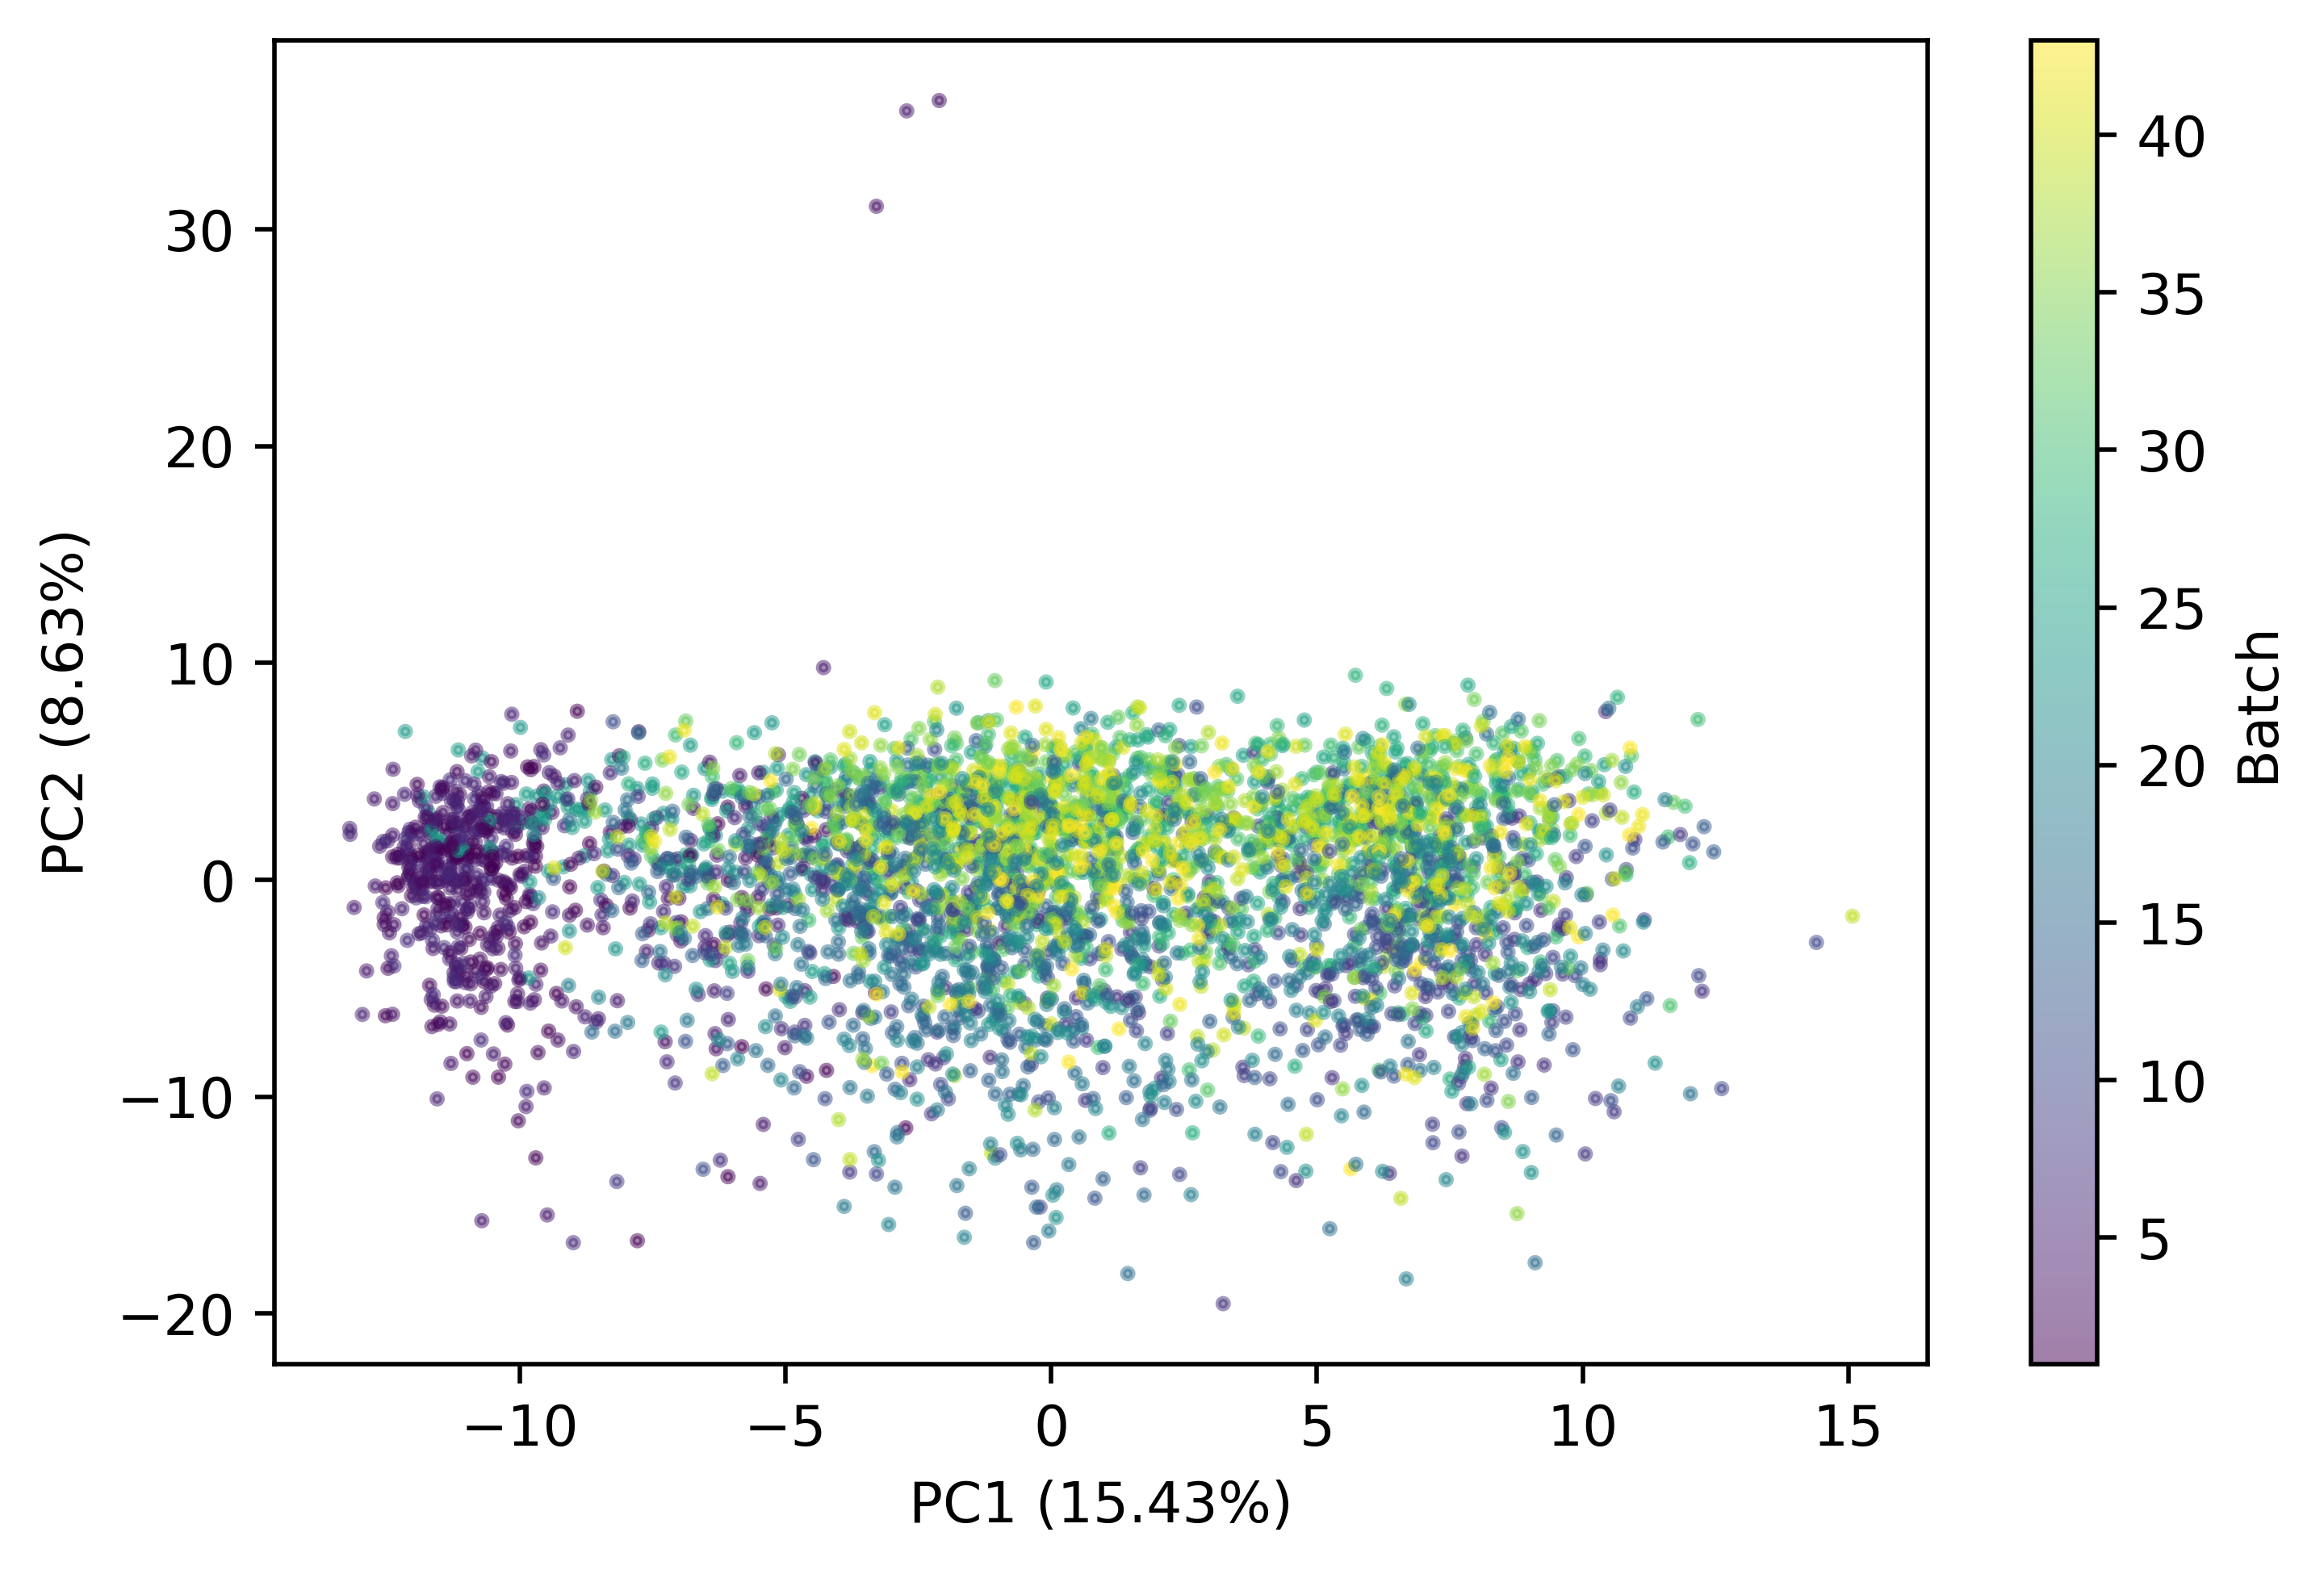

In [76]:
#do pca again
peak_areas_mat = merged_df[metadata["peak area sample name"]].to_numpy().transpose()
peak_areas_mat = np.log2(peak_areas_mat)
pca = PCA(n_components=2)
pca.fit(peak_areas_mat)
loads = pca.transform(peak_areas_mat)

#plot PCA
plt.figure()
plt.scatter(loads[:,0],loads[:,1],c=metadata["Batch #"].values,s=3,alpha=.5)
plt.colorbar(label="Batch")
#plt.title("Before Normalization")
var_explained = np.round(100*pca.explained_variance_ratio_,2)
plt.xlabel("PC1 (" + str(var_explained[0]) + "%)")
plt.ylabel("PC2 (" + str(var_explained[1]) + "%)")

plt.tight_layout()
plt.savefig("research_samp_pca_plot.png")

for x in range(len(loads)):
    if loads[x][1] > 20:
        print(metadata["peak area sample name"].values[x])

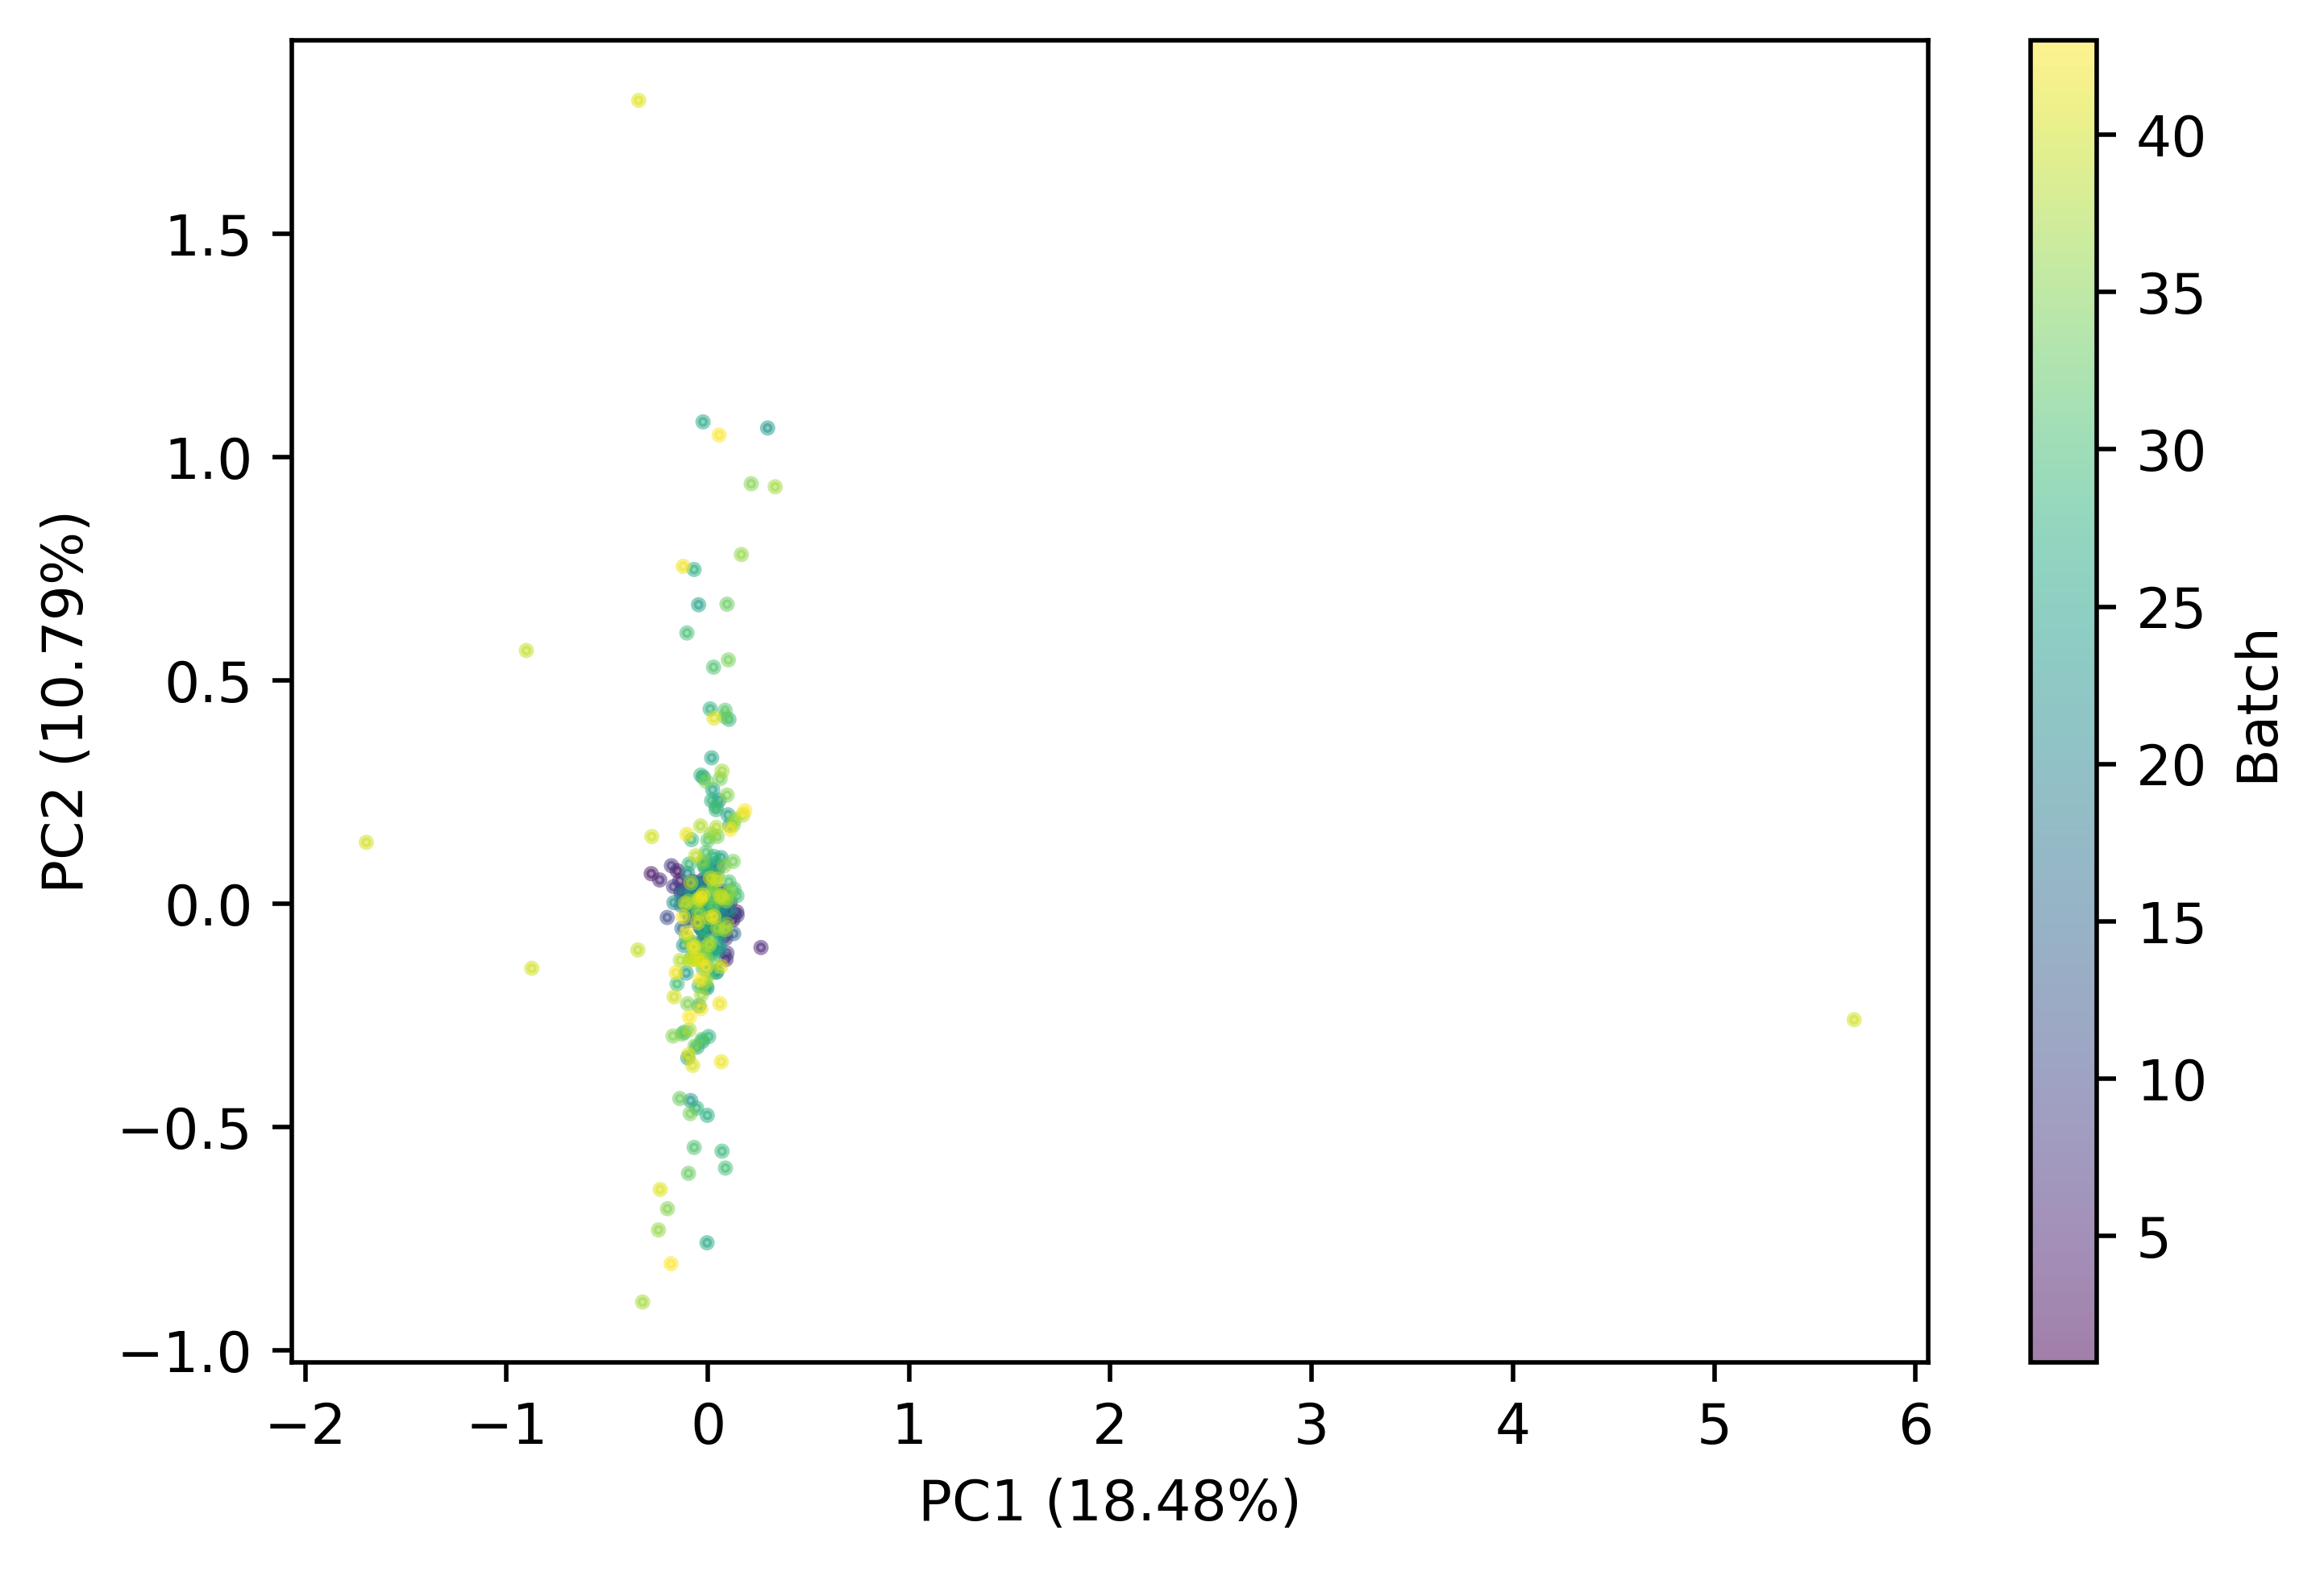

In [77]:
#do pca again
peak_areas_mat = merged_df[[x for x in merged_df.columns.values if "QC" in x]].to_numpy().transpose()
peak_areas_mat = np.log2(peak_areas_mat)
pca = PCA(n_components=2)
pca.fit(peak_areas_mat)
loads = pca.transform(peak_areas_mat)

batches = [int(x.split("_")[0].replace("Batch","")) for x in merged_df.columns.values if "QC" in x]

#plot PCA
plt.figure()
plt.scatter(loads[:,0],loads[:,1],c=batches,s=3,alpha=.5)
plt.colorbar(label="Batch")
#plt.title("Before Normalization")

var_explained = np.round(100*pca.explained_variance_ratio_,2)
plt.xlabel("PC1 (" + str(var_explained[0]) + "%)")
plt.ylabel("PC2 (" + str(var_explained[1]) + "%)")

plt.tight_layout()
plt.savefig("QC_pca_plot.png")

Batch4_13815676_1
Batch3_16320285_1
Batch3_19597880_1
Batch39_20972527_1
Batch39_20972527_2
Batch39_21183528_1
Batch39_21183528_2
Batch39_22757520_1
Batch39_22757520_2
Batch39_23392252_1
Batch39_23392252_2
Batch39_24328039_1
Batch39_24328039_2
Batch42_24491979_1
Batch39_30114185_1
Batch39_30114185_2
Batch39_31229701_1
Batch39_31229701_2
Batch39_31444185_1
Batch39_31444185_2
Batch39_31465082_1
Batch39_31465082_2
Batch39_31741044_1
Batch39_31741044_2
Batch39_32095482_1
Batch39_32095482_2
Batch39_32172173_1
Batch39_32172173_2
Batch39_32181430_1
Batch39_32181430_2
Batch39_32629974_1
Batch39_32629974_2
Batch39_33715088_1
Batch39_33715088_2
Batch39_33780560_1
Batch39_33780560_2
Batch39_33837295_1
Batch39_33837295_2
Batch39_34110726_1
Batch39_34110726_2
Batch39_34111948_1
Batch39_34111948_2
Batch39_34261230_1
Batch39_34261230_2
Batch39_34545790_1
Batch39_34545790_2
Batch39_34699950_1
Batch39_34699950_2
Batch39_34962134_1
Batch39_34962134_2
Batch39_35256973_1
Batch39_35256973_2
Batch39_3537456

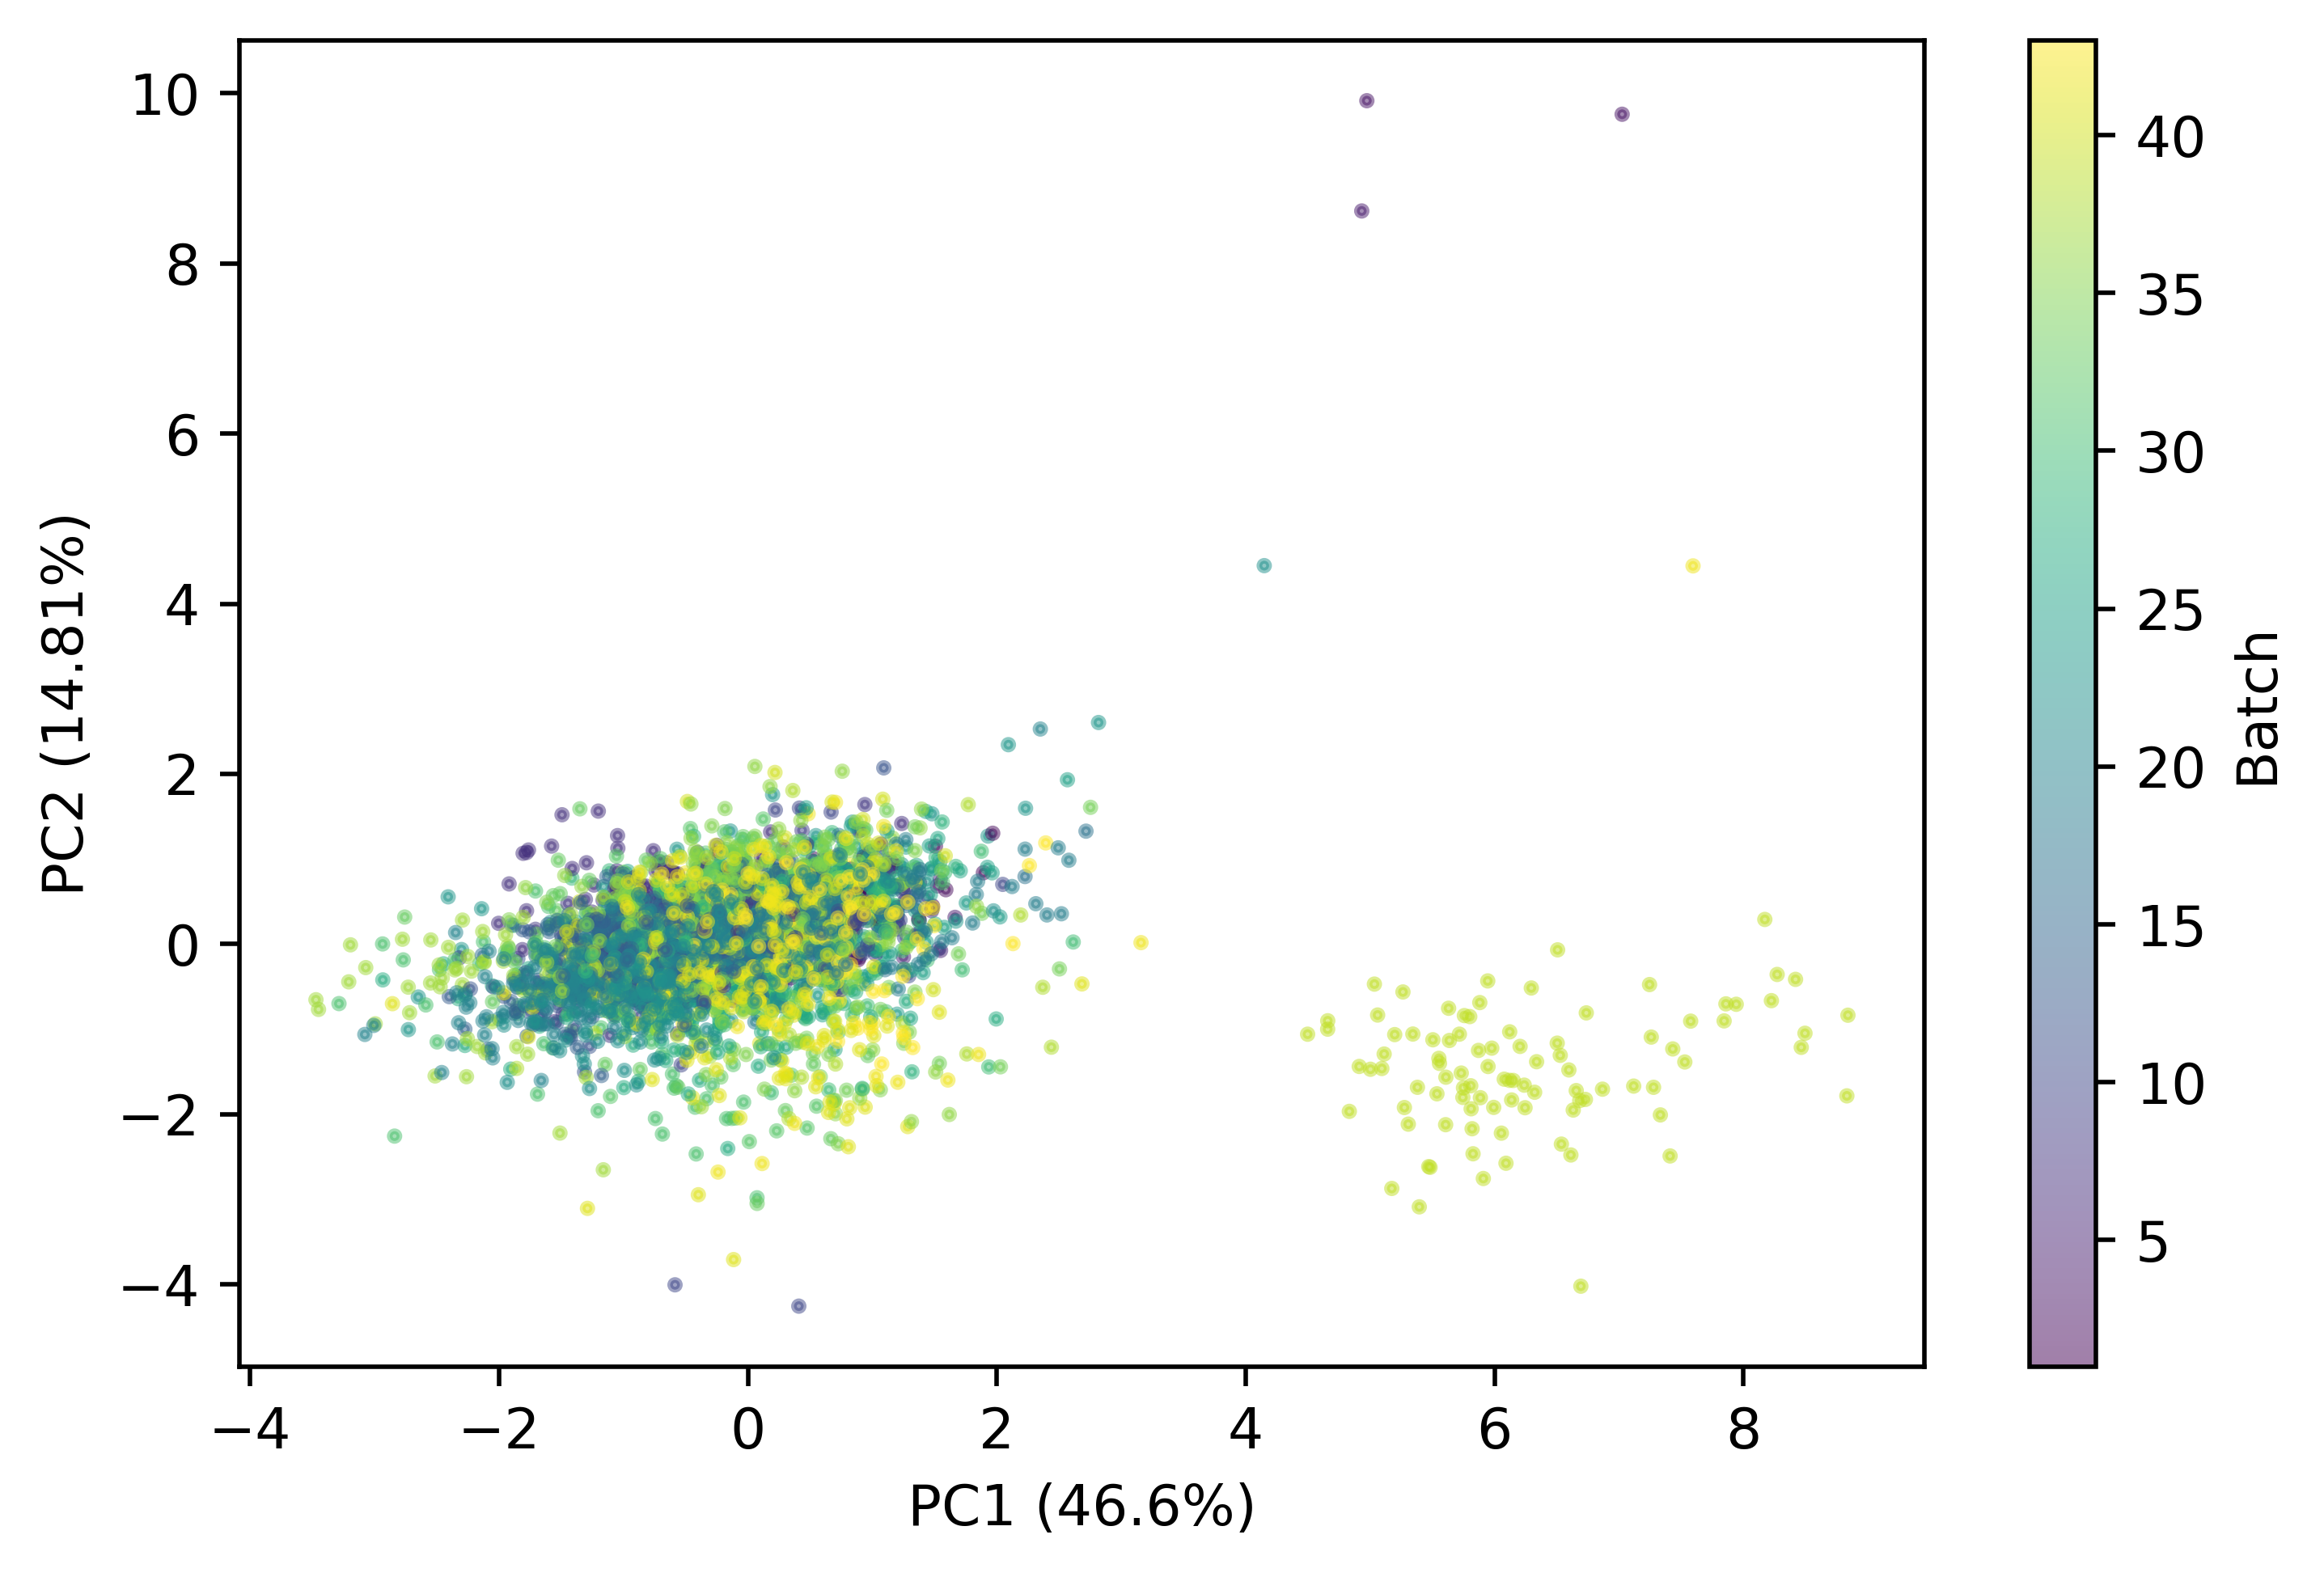

In [78]:
#do pca again
peak_areas_mat = merged_df[metadata["peak area sample name"]]
internalStands = [index for index,row in merged_df.iterrows() if "U13" in row["Unnamed: 0"]]
peak_areas_mat = peak_areas_mat.loc[internalStands,:].to_numpy().transpose()
peak_areas_mat = np.log2(peak_areas_mat)
pca = PCA(n_components=2)
pca.fit(peak_areas_mat)
loads = pca.transform(peak_areas_mat)

#plot PCA
plt.figure()
plt.scatter(loads[:,0],loads[:,1],c=metadata["Batch #"].values,s=3,alpha=.5)
plt.colorbar(label="Batch")
var_explained = np.round(100*pca.explained_variance_ratio_,2)
plt.xlabel("PC1 (" + str(var_explained[0]) + "%)")
plt.ylabel("PC2 (" + str(var_explained[1]) + "%)")

plt.tight_layout()
plt.savefig("IS_pca_plot.png")

for x in range(len(loads)):
    if loads[x][0] > 3:
        print(metadata["peak area sample name"].values[x])

#plt.title("Before Normalization")

In [79]:
peak_areas_research_samps = merged_df.set_index("Unnamed: 0")[metadata["peak area sample name"]].transpose().transform(np.log2)
peak_areas_research_samps = peak_areas_research_samps[[x for x in peak_areas_research_samps.columns.values if "U13" not in x]]
peak_areas_research_samps

Unnamed: 0,DL-2-Aminooctanoic acid,Homostachydrine,2-Aminobutyric acid,Prolylleucine,Norvaline,CORTISOL,N-ACETYLMETHIONINE,4-AMINOBENZOATE,CREATININE,1-METHYL-L-HISTIDINE,...,Acesulfame,CITRATE,OXALATE,Histidine,SARCOSINE,N Acetylornithine,GLYCOCHENODEOXYCHOLATE,7-Hydroxy-3-Methylflavone,N-ACETYLASPARTATE,GLYCOCHOLATE
Batch1_10014843_1,20.353114,18.350400,20.793690,20.713792,24.067365,18.511452,20.665650,20.186621,26.816481,20.699687,...,14.396596,25.494690,20.726564,23.291231,20.342745,18.753826,21.965643,14.374919,19.940792,18.528395
Batch1_10014843_2,20.221365,17.540258,20.566719,20.592828,23.437293,18.297407,20.604557,19.256602,26.699110,20.571074,...,17.540526,25.523741,20.916668,23.590646,20.349034,18.808926,21.656940,14.126001,19.983719,18.300020
Batch6_10016673_1,20.551155,20.238453,21.258106,20.751616,24.932778,18.422572,20.761849,20.762744,26.978282,21.721002,...,13.330357,25.397355,20.618648,23.470049,21.017258,17.854137,21.395544,16.883828,19.865322,18.339448
Batch6_10016673_2,20.435422,19.265325,21.560530,21.124173,24.719287,17.998793,20.744102,20.491929,27.008664,22.326101,...,13.594332,25.708690,20.476929,23.366845,20.558030,18.731553,22.676569,13.412567,20.414367,19.622552
Batch2_10041309_1,20.983964,19.161571,21.403533,20.085436,25.286607,18.005458,20.432423,19.905936,26.583899,20.950249,...,13.853146,26.472163,20.717067,23.373517,20.888217,18.551817,22.337844,14.252758,20.374199,17.830969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Batch43_49975486_1,19.965476,19.582060,21.555016,19.818981,24.346768,17.889729,20.601381,14.793576,26.468632,22.470536,...,12.110489,25.927504,20.761068,23.523345,20.074812,18.763272,22.074959,17.188341,19.931856,18.525613
Batch43_49975486_2,19.696358,19.006958,20.374820,20.246868,23.189693,18.101106,20.404146,21.388528,27.026794,21.730284,...,7.120569,26.045390,20.691105,23.380398,19.861062,18.860510,21.767483,17.232514,20.052468,18.108868
Batch12_49989098_1,20.851153,20.999963,21.707057,21.517812,23.659860,17.374572,20.464427,20.683149,27.150048,21.927928,...,14.200587,25.411959,21.093277,23.030172,20.851784,18.627142,22.368905,15.475499,20.788774,19.078883
Batch12_49989098_2,20.429389,19.994144,21.518348,21.341438,23.296935,17.855276,20.665254,17.593843,27.228978,22.127822,...,13.947886,26.189948,20.897844,23.250574,20.325571,19.346547,20.357402,12.939063,20.885901,16.315807


c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:1203: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


<Figure size 3000x2000 with 0 Axes>

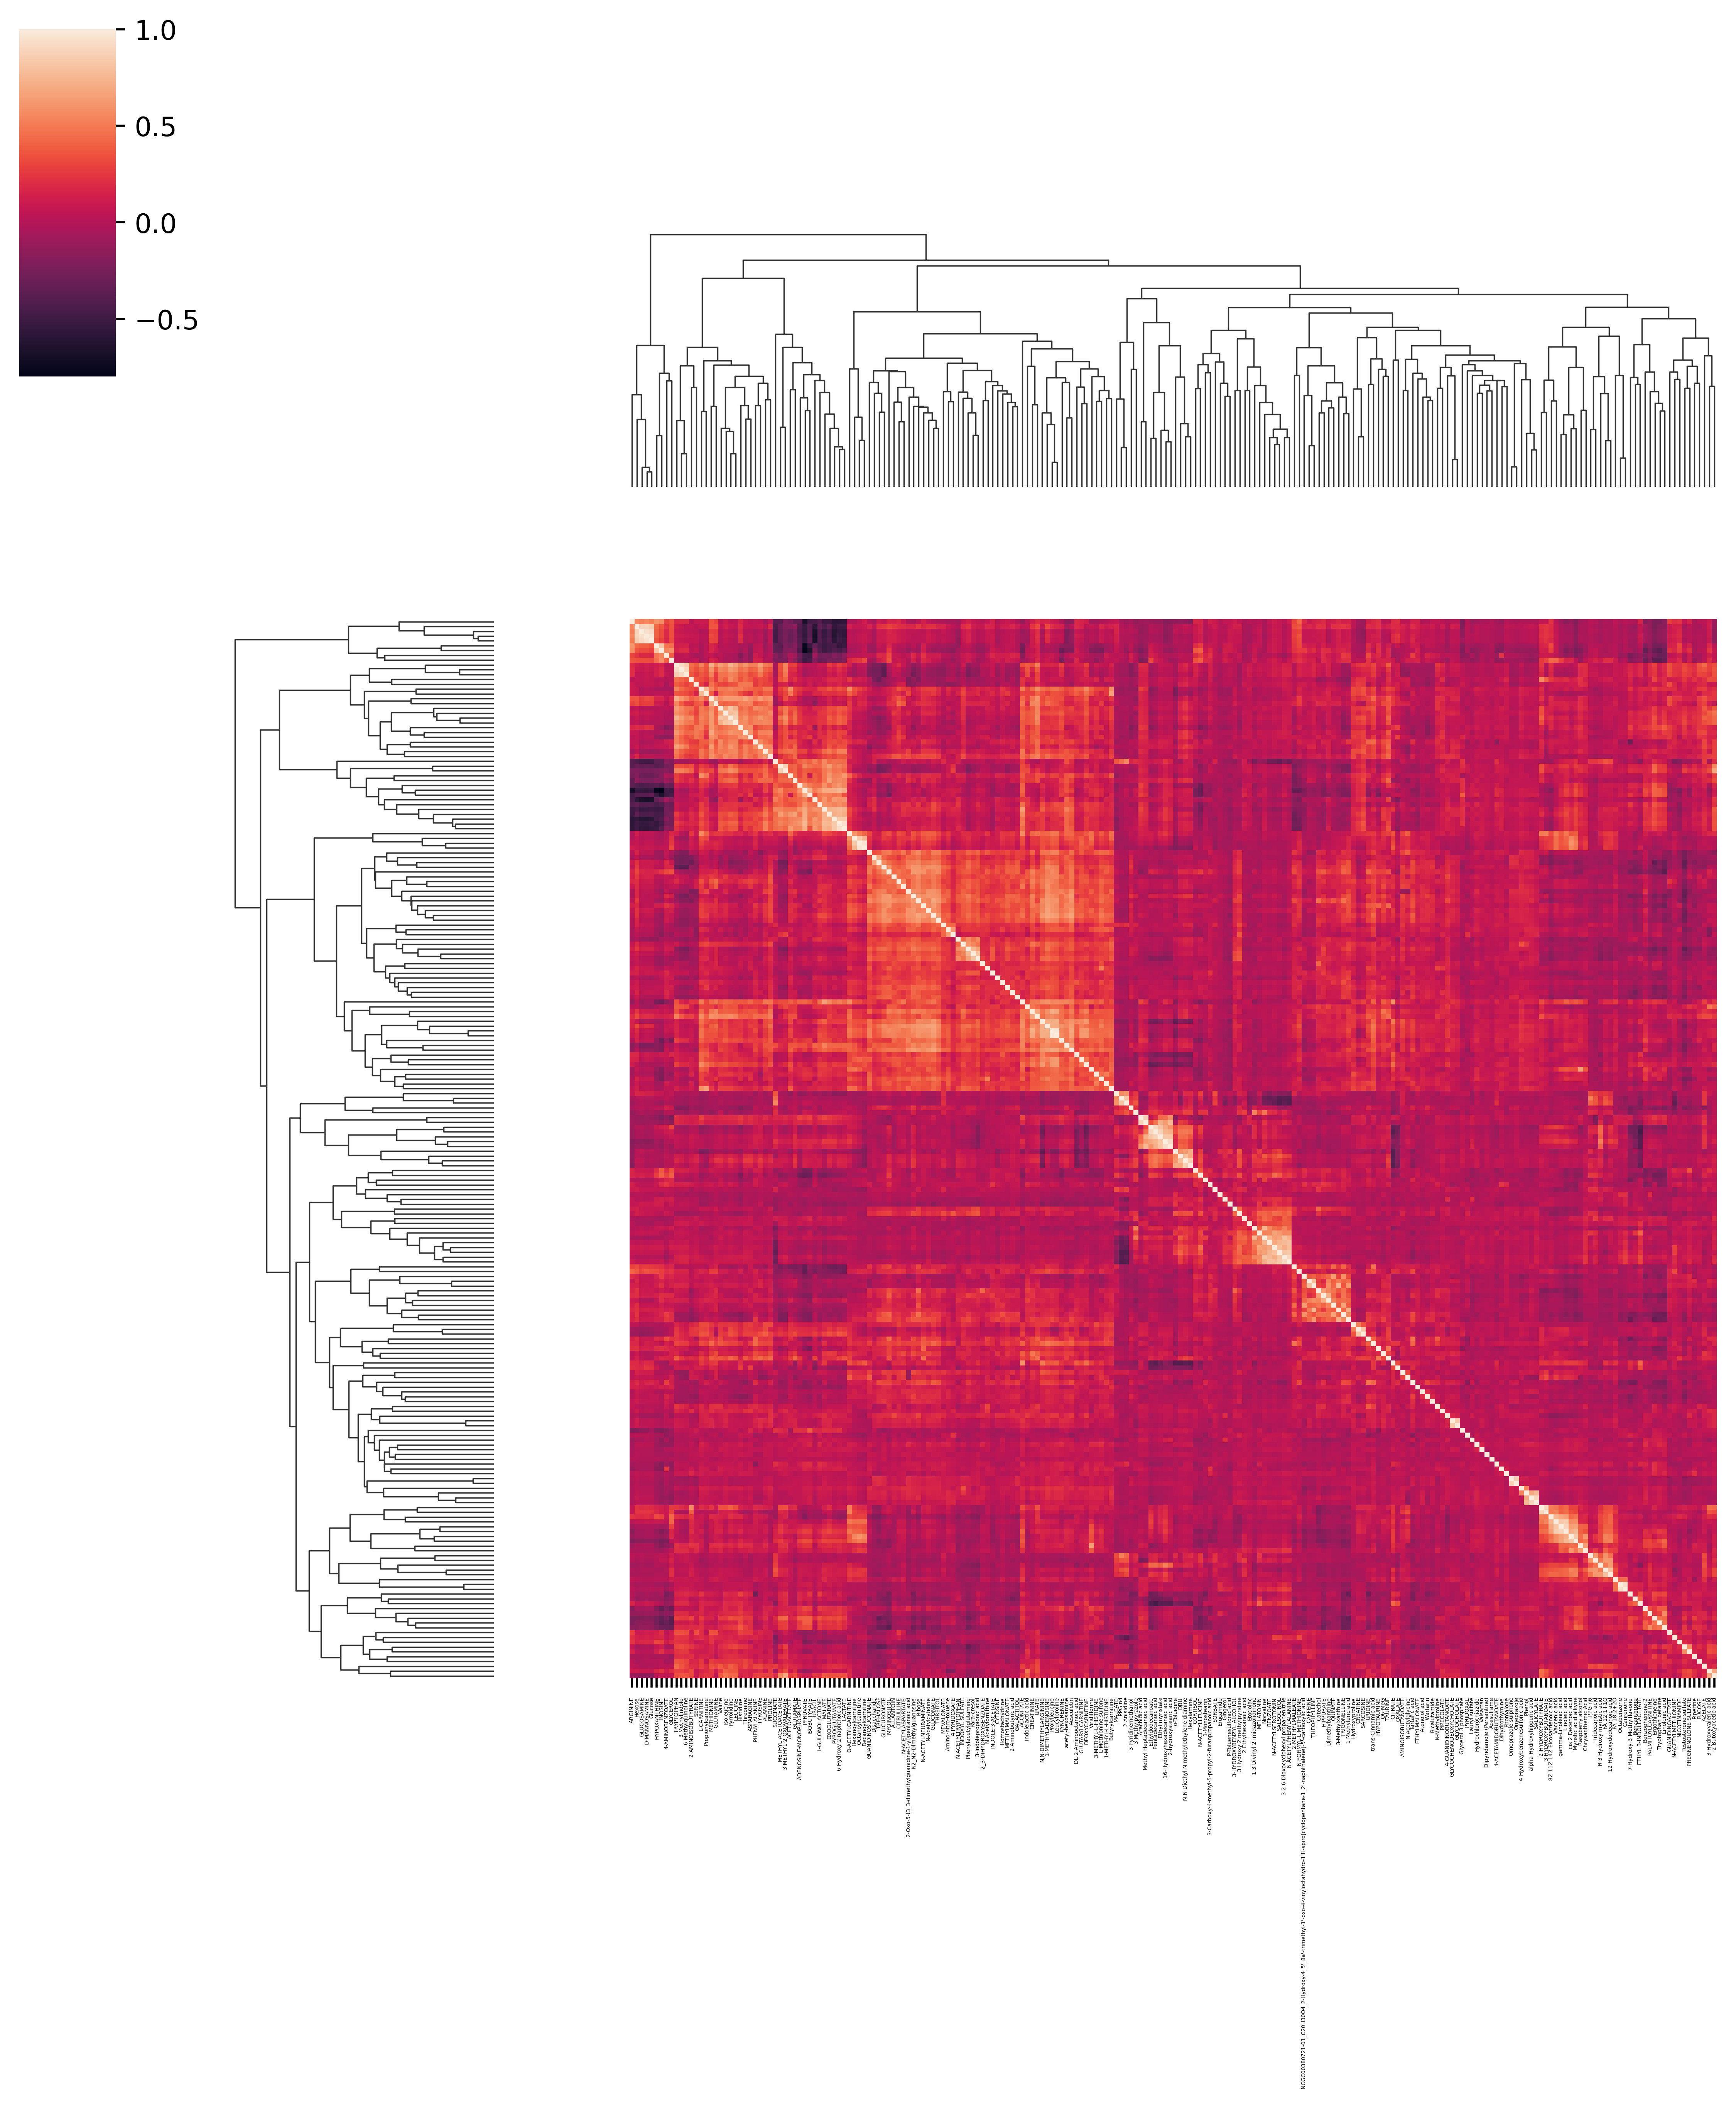

In [80]:
mat = np.corrcoef(peak_areas_research_samps.values.transpose())
plt.figure()
f = sb.clustermap(mat,xticklabels=peak_areas_research_samps.columns.values,yticklabels=False)
f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize = 2)
f.savefig("clustered_correlation_plot.png",dpi=300)

In [81]:
for x in range(mat.shape[0]):
    for y in range(x):
        if mat[x,y] > 0.95:
            print("corr=",mat[x,y],peak_areas_research_samps.columns.values[x],peak_areas_research_samps.columns.values[y],merged_df[merged_df["Unnamed: 0"] == peak_areas_research_samps.columns.values[x]].iloc[0,-1],merged_df[merged_df["Unnamed: 0"] == peak_areas_research_samps.columns.values[y]].iloc[0,-1])

corr= 0.9766012996280038 Leucylproline Prolylleucine polar_pos polar_pos
corr= 0.9520447863096385 Decanoylcarnitine Octanoylcarnitine polar_pos polar_pos
corr= 0.9577796641037205 Glucose D-MANNOSAMINE polar_neg polar_pos


In [82]:
#format for output
internalStands = [index for index,row in merged_df.iterrows() if "U13" in row["Unnamed: 0"]]
formatted_df = merged_df.drop(internalStands).iloc[:,:-1]
formatted_df = formatted_df.rename({"Unnamed: 0":"compound"},axis=1).set_index("compound")
formatted_df.to_csv("formatted_peak_areas_pos_neg_merged_imputted_normalized.csv")
formatted_df

,Batch1_QC_01,Batch1_18270389_2,Batch1_13135943_1,Batch1_10800001_1,Batch1_13135943_2,Batch1_12397428_1,Batch1_10457357_1,Batch1_12552874_1,Batch1_12406146_1,Batch1_14179683_1,...,Batch43_QC_08,Batch43_47234570_1,Batch43_22592403_1,Batch43_21224361_2,Batch43_41519985_1,Batch43_48823298_2,Batch43_20214140_1,Batch43_41550303_1,Batch43_45611266_1,Batch43_QC_09
compound,,,,,,,,,,,,,,,,,,,,,
DL-2-Aminooctanoic acid,1.520814e+06,1.680481e+06,2.098481e+06,8.364250e+05,1.509812e+06,2.568371e+06,1.628636e+06,7.042096e+05,9.264860e+05,1.733676e+06,...,1.509291e+06,6.307791e+05,1.383205e+06,5.529746e+05,6.832787e+05,2.477801e+06,7.563646e+05,5.707430e+05,7.737551e+05,1.541432e+06
Homostachydrine,7.303151e+05,3.495565e+05,1.245263e+06,1.094810e+06,3.130584e+05,2.225324e+06,3.608774e+05,5.568893e+05,1.797838e+06,4.675419e+05,...,7.257120e+05,7.549187e+05,2.335821e+05,6.512467e+05,5.168415e+05,7.355087e+05,5.075603e+05,5.496599e+05,2.697459e+05,7.399589e+05
2-Aminobutyric acid,3.042292e+06,2.818492e+06,3.170177e+06,2.702041e+06,3.139837e+06,1.471388e+07,1.845654e+06,2.385485e+06,3.908583e+06,3.491147e+06,...,3.481392e+06,4.518470e+06,2.184468e+06,2.111428e+06,2.612831e+06,2.880093e+06,2.052902e+06,1.515226e+06,1.449198e+06,3.042713e+06
Prolylleucine,1.986430e+06,2.293874e+06,1.840432e+06,9.836316e+05,1.623830e+06,5.647065e+06,1.154363e+06,1.847033e+06,1.601308e+06,1.395735e+06,...,1.874881e+06,1.996569e+06,9.461310e+05,8.147341e+05,8.276725e+05,2.044511e+06,9.474888e+05,8.638931e+05,1.305442e+06,1.991229e+06
Norvaline,2.682169e+07,1.540531e+07,2.587917e+07,9.315948e+06,1.349270e+07,1.121179e+07,1.314913e+07,9.312292e+06,9.275203e+06,3.682847e+07,...,2.652518e+07,5.533119e+06,7.607609e+06,4.757579e+06,1.014524e+07,6.465742e+06,2.473767e+07,2.241554e+07,6.069710e+06,2.696433e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N Acetylornithine,5.760589e+05,3.947217e+05,2.616917e+05,4.186157e+05,1.441564e+05,1.000277e+06,7.778760e+05,5.361653e+05,4.513159e+05,4.781684e+05,...,5.896782e+05,8.569234e+05,8.913886e+04,1.426857e+05,5.335996e+04,7.258871e+05,2.182454e+05,4.259429e+05,5.291319e+05,5.878310e+05
GLYCOCHENODEOXYCHOLATE,6.212162e+06,8.470102e+06,1.628184e+06,1.758140e+07,1.973073e+07,9.877153e+05,4.909381e+06,1.121909e+07,4.384533e+06,2.933615e+06,...,6.231471e+06,1.910524e+06,1.573697e+06,1.563941e+07,4.077600e+06,4.705867e+06,4.313606e+06,4.550420e+06,4.920427e+06,6.187471e+06
7-Hydroxy-3-Methylflavone,3.766962e+05,2.448964e+04,3.842336e+04,1.771779e+04,2.660539e+04,2.634558e+04,2.686638e+04,2.556021e+04,1.159478e+04,2.600278e+04,...,3.733227e+05,1.182529e+05,1.224765e+05,1.000487e+05,1.382723e+05,2.457352e+05,1.269162e+05,1.611957e+05,1.489906e+05,3.492715e+05


In [83]:
metInfo = pd.read_csv("metabolite_info_polars_with_identifiers_v4.csv")
metInfo

,Name in peak area file,polarity,IUPAC Name,InChIKey,pubchem,kegg,hmdb,smiles,formula,synonyms
0,1-METHYL-L-HISTIDINE,positive,(2S)-2-amino-3-(1-methylimidazol-4-yl)propanoi...,BRMWTNUJHUMWMS-LURJTMIESA-N,92105,NaN,HMDB0000001,CN1C=C(N=C1)C[C@@H](C(=O)O)N,C7H11N3O2,;1-Methyl-L-histidine;1-Methylhistidine;332-80...
1,2-HYDROXYBUTYRATE,negative,2-hydroxybutanoic acid,AFENDNXGAFYKQO-UHFFFAOYSA-N,11266,NaN,HMDB0000008,CCC(C(=O)O)O,C4H8O3,;2-Hydroxybutyric acid;2-HYDROXYBUTANOIC ACID;...
2,4-PYRIDOXATE,negative,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
3,4-PYRIDOXATE,positive,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
4,ADENOSINE-MONOPHOSPHATE,negative,"[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihyd...",UDMBCSSLTHHNCD-KQYNXXCUSA-N,6083,C00020,HMDB0000045,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,C10H14N5O7P,;adenosine 5-monophosphate;5-adenylic acid;ade...
...,...,...,...,...,...,...,...,...,...,...
284,4 Pentylaniline,positive,4-pentylaniline,DGFTWBUZRHAHTH-UHFFFAOYSA-N,93162,NaN,NaN,CCCCCC1=CC=C(C=C1)N,C11H17N,;4-Pentylaniline;33228-44-3;Benzenamine_ 4-pen...
285,CORTISOL 21-ACETATE,positive,"[2-[(8S,9S,10R,11S,13S,14S,17R)-11,17-dihydrox...",ALEXXDVDDISNDU-JZYPGELDSA-N,5744,C02821,NaN,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(C[C@@H]([C@...,C23H32O6,;hydrocortisone acetate;50-03-3;Cortisol 21-ac...
286,GUANINE,positive,"2-amino-1,7-dihydropurin-6-one",UYTPUPDQBNUYGX-UHFFFAOYSA-N,135398634,C00242,HMDB0000132,C1=NC2=C(N1)C(=O)NC(=N2)N,C5H5N5O,;guanine;73-40-5;2-Amino-6-hydroxypurine;Guani...
287,D-MANNOSAMINE,positive,"(3S,4R,5S,6R)-3-amino-6-(hydroxymethyl)oxane-2...",MSWZFWKMSRAUBD-CBPJZXOFSA-N,440049,NaN,NaN,C([C@@H]1[C@H]([C@@H]([C@@H](C(O1)O)N)O)O)O,C6H13NO5,;2-Amino-2-Deoxy-D-Mannopyranose;2-Amino-2-Deo...


In [84]:
filtMetInfo = metInfo[metInfo["Name in peak area file"].isin(formatted_df.index.values)]
filtMetInfo

,Name in peak area file,polarity,IUPAC Name,InChIKey,pubchem,kegg,hmdb,smiles,formula,synonyms
0,1-METHYL-L-HISTIDINE,positive,(2S)-2-amino-3-(1-methylimidazol-4-yl)propanoi...,BRMWTNUJHUMWMS-LURJTMIESA-N,92105,NaN,HMDB0000001,CN1C=C(N=C1)C[C@@H](C(=O)O)N,C7H11N3O2,;1-Methyl-L-histidine;1-Methylhistidine;332-80...
1,2-HYDROXYBUTYRATE,negative,2-hydroxybutanoic acid,AFENDNXGAFYKQO-UHFFFAOYSA-N,11266,NaN,HMDB0000008,CCC(C(=O)O)O,C4H8O3,;2-Hydroxybutyric acid;2-HYDROXYBUTANOIC ACID;...
2,4-PYRIDOXATE,negative,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
3,4-PYRIDOXATE,positive,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
4,ADENOSINE-MONOPHOSPHATE,negative,"[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihyd...",UDMBCSSLTHHNCD-KQYNXXCUSA-N,6083,C00020,HMDB0000045,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,C10H14N5O7P,;adenosine 5-monophosphate;5-adenylic acid;ade...
...,...,...,...,...,...,...,...,...,...,...
280,Amino-nitro-toluene,positive,2-methyl-5-nitroaniline,DSBIJCMXAIKKKI-UHFFFAOYSA-N,7444,C16398,NaN,CC1=C(C=C(C=C1)[N+](=O)[O-])N,C7H8N2O2,;2-Methyl-5-nitroaniline;99-55-8;2-Amino-4-nit...
282,PPG n6,positive,2-[2-[2-[2-[2-(2-hydroxypropoxy)propoxy]propox...,UDOJNGPPRYJMKR-UHFFFAOYSA-N,12827208,NaN,NaN,CC(CO)OCC(C)OCC(C)OCC(C)OCC(C)OCC(C)O,C18H38O7,;HEXAPROPYLENE GLYCOL;SCHEMBL268561;DTXSID6090...
283,3-Pyridinemethanol,positive,pyridin-3-ylmethanol,MVQVNTPHUGQQHK-UHFFFAOYSA-N,7510,NaN,HMDB0245980,C1=CC(=CN=C1)CO,C6H7NO,;3-PYRIDINEMETHANOL;100-55-0;Nicotinyl alcohol...
287,D-MANNOSAMINE,positive,"(3S,4R,5S,6R)-3-amino-6-(hydroxymethyl)oxane-2...",MSWZFWKMSRAUBD-CBPJZXOFSA-N,440049,NaN,NaN,C([C@@H]1[C@H]([C@@H]([C@@H](C(O1)O)N)O)O)O,C6H13NO5,;2-Amino-2-Deoxy-D-Mannopyranose;2-Amino-2-Deo...


In [85]:
posMets = merged_df[merged_df["assay"] == "polar_pos"]
toDrop = filtMetInfo[filtMetInfo["polarity"] == "positive"]
toDrop = toDrop[~toDrop["Name in peak area file"].isin(posMets["Unnamed: 0"])]
filtMetInfo = filtMetInfo.drop(toDrop.index.values,axis=0)
filtMetInfo

,Name in peak area file,polarity,IUPAC Name,InChIKey,pubchem,kegg,hmdb,smiles,formula,synonyms
0,1-METHYL-L-HISTIDINE,positive,(2S)-2-amino-3-(1-methylimidazol-4-yl)propanoi...,BRMWTNUJHUMWMS-LURJTMIESA-N,92105,NaN,HMDB0000001,CN1C=C(N=C1)C[C@@H](C(=O)O)N,C7H11N3O2,;1-Methyl-L-histidine;1-Methylhistidine;332-80...
1,2-HYDROXYBUTYRATE,negative,2-hydroxybutanoic acid,AFENDNXGAFYKQO-UHFFFAOYSA-N,11266,NaN,HMDB0000008,CCC(C(=O)O)O,C4H8O3,;2-Hydroxybutyric acid;2-HYDROXYBUTANOIC ACID;...
2,4-PYRIDOXATE,negative,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
4,ADENOSINE-MONOPHOSPHATE,negative,"[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihyd...",UDMBCSSLTHHNCD-KQYNXXCUSA-N,6083,C00020,HMDB0000045,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,C10H14N5O7P,;adenosine 5-monophosphate;5-adenylic acid;ade...
6,ACETOACETATE,negative,3-oxobutanoic acid,WDJHALXBUFZDSR-UHFFFAOYSA-N,96,C00164,HMDB0000060,CC(=O)CC(=O)O,C4H6O3,;acetoacetic acid;3-oxobutanoic acid;541-50-4;...
...,...,...,...,...,...,...,...,...,...,...
279,Atenolol acid,positive,2-[4-[2-hydroxy-3-(propan-2-ylamino)propoxy]ph...,PUQIRTNPJRFRCZ-UHFFFAOYSA-N,62936,NaN,NaN,CC(C)NCC(COC1=CC=C(C=C1)CC(=O)O)O,C14H21NO4,;Metoprolol acid;56392-14-4;Atenolol acid;2-[4...
280,Amino-nitro-toluene,positive,2-methyl-5-nitroaniline,DSBIJCMXAIKKKI-UHFFFAOYSA-N,7444,C16398,NaN,CC1=C(C=C(C=C1)[N+](=O)[O-])N,C7H8N2O2,;2-Methyl-5-nitroaniline;99-55-8;2-Amino-4-nit...
282,PPG n6,positive,2-[2-[2-[2-[2-(2-hydroxypropoxy)propoxy]propox...,UDOJNGPPRYJMKR-UHFFFAOYSA-N,12827208,NaN,NaN,CC(CO)OCC(C)OCC(C)OCC(C)OCC(C)OCC(C)O,C18H38O7,;HEXAPROPYLENE GLYCOL;SCHEMBL268561;DTXSID6090...
283,3-Pyridinemethanol,positive,pyridin-3-ylmethanol,MVQVNTPHUGQQHK-UHFFFAOYSA-N,7510,NaN,HMDB0245980,C1=CC(=CN=C1)CO,C6H7NO,;3-PYRIDINEMETHANOL;100-55-0;Nicotinyl alcohol...


In [86]:
negMets = merged_df[merged_df["assay"] == "polar_neg"]
toDrop = filtMetInfo[filtMetInfo["polarity"] == "negative"]
toDrop = toDrop[~toDrop["Name in peak area file"].isin(negMets["Unnamed: 0"])]
filtMetInfo = filtMetInfo.drop(toDrop.index.values,axis=0)
filtMetInfo

,Name in peak area file,polarity,IUPAC Name,InChIKey,pubchem,kegg,hmdb,smiles,formula,synonyms
0,1-METHYL-L-HISTIDINE,positive,(2S)-2-amino-3-(1-methylimidazol-4-yl)propanoi...,BRMWTNUJHUMWMS-LURJTMIESA-N,92105,NaN,HMDB0000001,CN1C=C(N=C1)C[C@@H](C(=O)O)N,C7H11N3O2,;1-Methyl-L-histidine;1-Methylhistidine;332-80...
1,2-HYDROXYBUTYRATE,negative,2-hydroxybutanoic acid,AFENDNXGAFYKQO-UHFFFAOYSA-N,11266,NaN,HMDB0000008,CCC(C(=O)O)O,C4H8O3,;2-Hydroxybutyric acid;2-HYDROXYBUTANOIC ACID;...
2,4-PYRIDOXATE,negative,3-hydroxy-5-(hydroxymethyl)-2-methylpyridine-4...,HXACOUQIXZGNBF-UHFFFAOYSA-N,6723,C00847,HMDB0000017,CC1=NC=C(C(=C1O)C(=O)O)CO,C8H9NO4,;4-Pyridoxic acid;Pyridoxic acid;82-82-6;4-Pyr...
4,ADENOSINE-MONOPHOSPHATE,negative,"[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihyd...",UDMBCSSLTHHNCD-KQYNXXCUSA-N,6083,C00020,HMDB0000045,C1=NC(=C2C(=N1)N(C=N2)[C@H]3[C@@H]([C@@H]([C@H...,C10H14N5O7P,;adenosine 5-monophosphate;5-adenylic acid;ade...
6,ACETOACETATE,negative,3-oxobutanoic acid,WDJHALXBUFZDSR-UHFFFAOYSA-N,96,C00164,HMDB0000060,CC(=O)CC(=O)O,C4H6O3,;acetoacetic acid;3-oxobutanoic acid;541-50-4;...
...,...,...,...,...,...,...,...,...,...,...
279,Atenolol acid,positive,2-[4-[2-hydroxy-3-(propan-2-ylamino)propoxy]ph...,PUQIRTNPJRFRCZ-UHFFFAOYSA-N,62936,NaN,NaN,CC(C)NCC(COC1=CC=C(C=C1)CC(=O)O)O,C14H21NO4,;Metoprolol acid;56392-14-4;Atenolol acid;2-[4...
280,Amino-nitro-toluene,positive,2-methyl-5-nitroaniline,DSBIJCMXAIKKKI-UHFFFAOYSA-N,7444,C16398,NaN,CC1=C(C=C(C=C1)[N+](=O)[O-])N,C7H8N2O2,;2-Methyl-5-nitroaniline;99-55-8;2-Amino-4-nit...
282,PPG n6,positive,2-[2-[2-[2-[2-(2-hydroxypropoxy)propoxy]propox...,UDOJNGPPRYJMKR-UHFFFAOYSA-N,12827208,NaN,NaN,CC(CO)OCC(C)OCC(C)OCC(C)OCC(C)OCC(C)O,C18H38O7,;HEXAPROPYLENE GLYCOL;SCHEMBL268561;DTXSID6090...
283,3-Pyridinemethanol,positive,pyridin-3-ylmethanol,MVQVNTPHUGQQHK-UHFFFAOYSA-N,7510,NaN,HMDB0245980,C1=CC(=CN=C1)CO,C6H7NO,;3-PYRIDINEMETHANOL;100-55-0;Nicotinyl alcohol...


In [87]:
filtMetInfo.to_csv("metabolite_info_polars_with_identifiers_v5.csv",index=False)